## Abstract

It is vital that credit card companies are able to 
identify fraudulent credit card transactions so that customers 
are not charged for items that they did not purchase. Such 
problems can be tackled with Data Science and its importance, 
along with Machine Learning, cannot be overstated. This 
project intends to illustrate the modelling of a data set using 
machine learning with Credit Card Fraud Detection. The Credit 
Card Fraud Detection Problem includes modelling past credit 
card transactions with the data of the ones that turned out to be 
fraud. This model is then used to recognize whether a new 
transaction is fraudulent or not. Our objective here is to detect 
100% of the fraudulent transactions while minimizing the 
incorrect fraud classifications. Credit Card Fraud Detection is a 
typical sample of classification. In this process, we have focused 
on analysing and pre-processing data sets as well as the 
deployment of multiple anomaly detection algorithms such as 
Local Outlier Factor and Isolation Forest algorithm on the PCA 
transformed Credit Card Transaction data.

## Keywords

Credit card fraud, applications of machine 
learning, data science, data Analysis


## INTRODUCTION

'Fraud' in credit card transactions is unauthorized and 
unwanted usage of an account by someone other than the 
owner of that account. Necessary prevention measures can be 
taken to stop this abuse and the behaviour of such fraudulent 
practices can be studied to minimize it and protect against 
similar occurrences in the future.In other words, Credit Card 
Fraud can be defined as a case where a person uses someone 
else’s credit card for personal reasons while the owner and the 
card issuing authorities are unaware of the fact that the card is 
being used.

Fraud detection involves monitoring the activities of 
populations of users in order to estimate, perceive or avoid 
objectionable behaviour, which consist of fraud, intrusion, and 
defaulting.

This is a very relevant problem that demands the attention of 
communities such as machine learning and data science where 
the solution to this problem can be automated.
This problem is particularly challenging from the perspective 
of learning, as it is characterized by various factors such as 
class imbalance. The number of valid transactions far 
outnumber fraudulent ones. Also, the transaction patterns 
often change their statistical properties over the course of 
time.

These are not the only challenges in the implementation of a 
real-world fraud detection system, however. In real world 
examples, the massive stream of payment requests is quickly 
scanned by automatic tools that determine which transactions 
to authorize.
Machine learning algorithms are employed to analyse all the 
authorized transactions and report the suspicious ones. These 
reports are investigated by professionals who contact the 
cardholders to confirm if the transaction was genuine or 
fraudulent. 
The investigators provide a feedback to the automated system 
which is used to train and update the algorithm to eventually 
improve the fraud-detection performance over time.


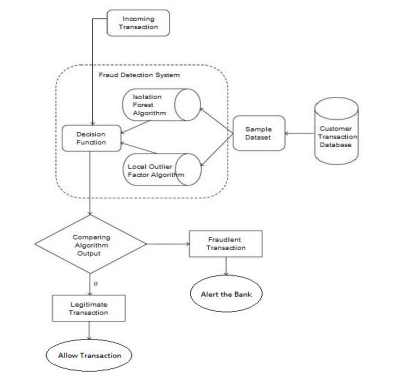

Fraud detection methods are continuously developed to defend 
criminals in adapting to their fraudulent strategies. These 
frauds are classified as:
• Credit Card Frauds: Online and Offline\
• Card Theft\
• Account Bankruptcy\
• Device Intrusion\
• Application Fraud\
• Counterfeit Card\
• Telecommunication Fraud

Some of the currently used approaches to detection of fraud such are:\
• Isolation Forest\
• Logistic Regression\
• Decision tree\
• Support Vector Machines\
•  One-Class SVM\
• K-Nearest Neighbour

# Data Collection: 

Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine (From kaggle.com)

# About Dataset

Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
# Imported Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## DATA ANALYSIS

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().max()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

([<matplotlib.axis.XTick at 0x1a84a0e5ad0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

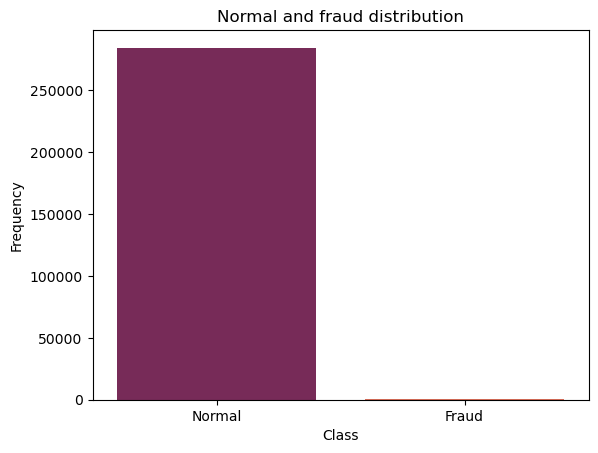

In [8]:
sns.countplot(df, x='Class', palette='rocket')
plt.title("Normal and fraud distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
labels = ['Normal', 'Fraud']
plt.xticks(range(2),labels)



From above graph we can say that our data is highly unbalanced . it may lead to overfitting model so, we need to balance the dataset . 

In [9]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

Shape of normal & fraud data set

In [10]:
fraud_people.shape

(492, 31)

In [11]:
normal_people.shape

(284315, 31)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Finding out the avg amount in our both the data set

In [12]:
fraud_people['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
normal_people['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

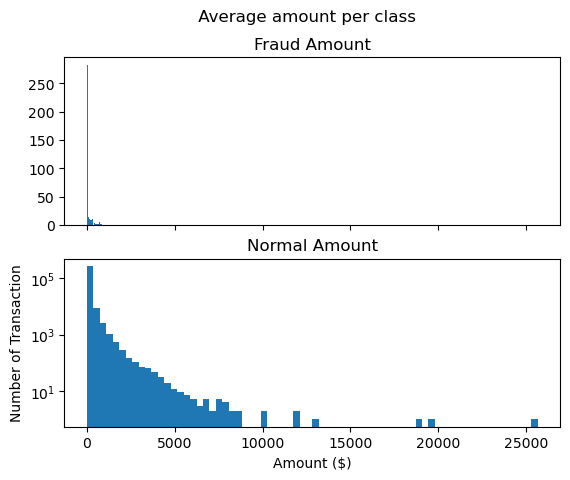

In [14]:
graph, (plot1,plot2) = plt.subplots(2,1, sharex=True)
graph.suptitle(' Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'], bins=bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'], bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transaction')
plt.yscale('log')
plt.show();

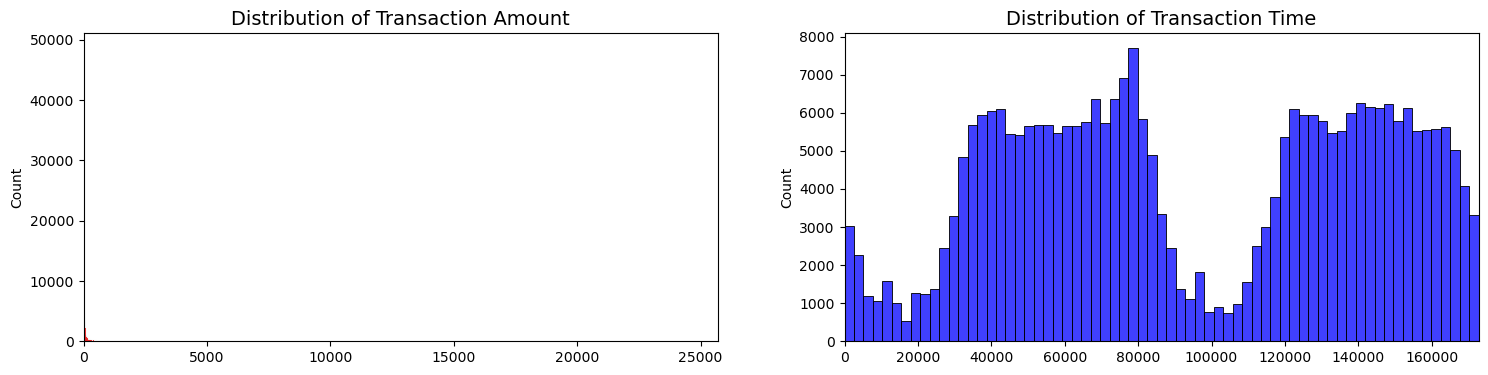

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

Correlation Matrices\
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud.

<Axes: >

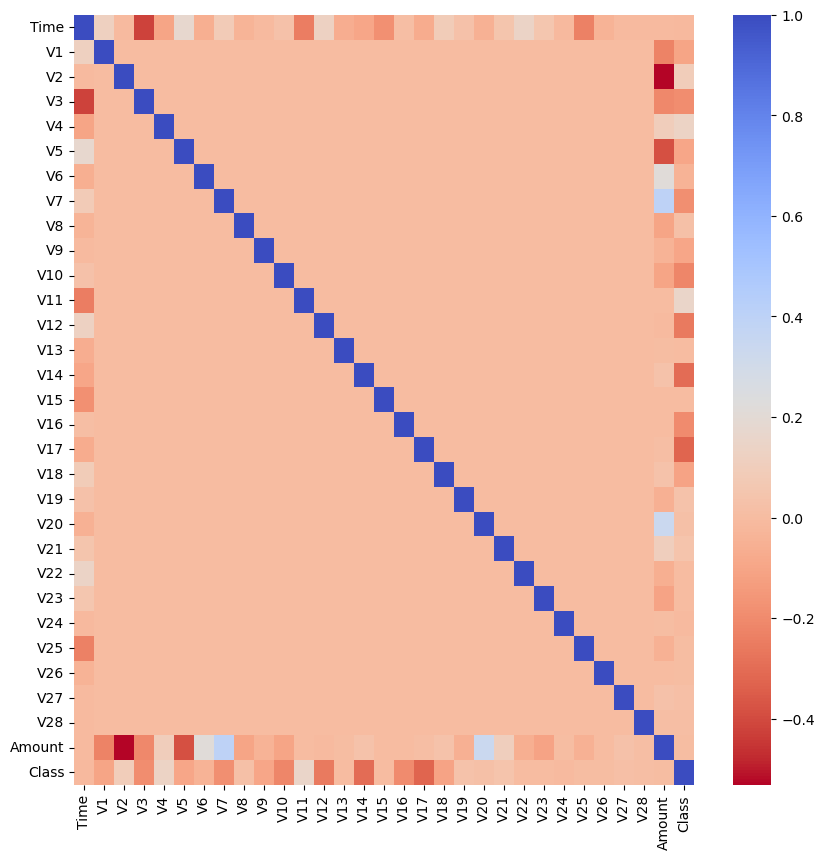

In [16]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

 above  heatmap does not show Correlation in dataset beacuse the this dataset imbalanced & skewed.


# PyCaret

 # 🚀 Classification
 
PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. 

The goal is to predict the categorical class labels which are discrete and unordered. Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). 

This module can be used for binary or multiclass problems.

In [17]:
! pip install pycaret

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
from pycaret.classification import *

In [20]:
s = setup(data = df, target = 'Class')

,Description,Value
0,Session id,8690
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [21]:
# functional API
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9501,0.7642,0.9425,0.8414,0.8411,0.8471,95.6240
et,Extra Trees Classifier,0.9995,0.9530,0.7613,0.9352,0.8372,0.8370,0.8425,13.3820
xgboost,Extreme Gradient Boosting,0.9995,0.9833,0.7873,0.9447,0.8569,0.8567,0.8612,69.0740
lda,Linear Discriminant Analysis,0.9994,0.9840,0.7586,0.8560,0.8031,0.8028,0.8049,1.4950
ada,Ada Boost Classifier,0.9992,0.9765,0.6799,0.8175,0.7405,0.7401,0.7442,39.2530
lr,Logistic Regression,0.9991,0.9569,0.5927,0.8359,0.6914,0.6909,0.7023,12.5980
dt,Decision Tree Classifier,0.9990,0.8758,0.7522,0.7071,0.7264,0.7259,0.7275,8.9560
gbc,Gradient Boosting Classifier,0.9989,0.6373,0.4520,0.8348,0.5645,0.5640,0.6003,172.8920
ridge,Ridge Classifier,0.9988,0.9840,0.4098,0.8278,0.5469,0.5464,0.5812,0.3470
knn,K Neighbors Classifier,0.9983,0.5986,0.0320,0.5750,0.0597,0.0596,0.1304,24.3070


In [22]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8690, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

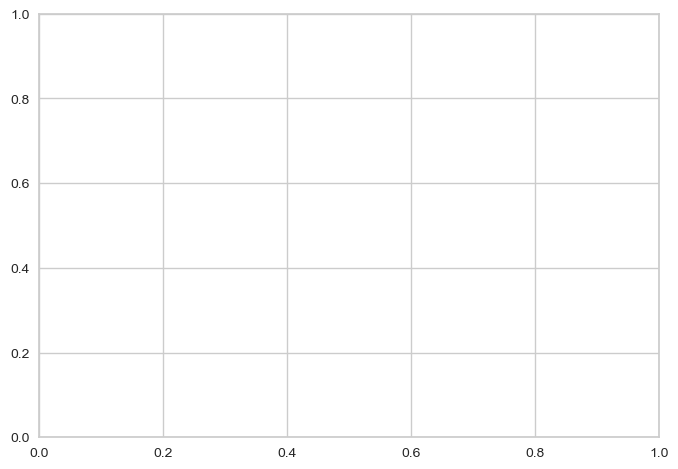

In [ ]:
evaluate_model(best)

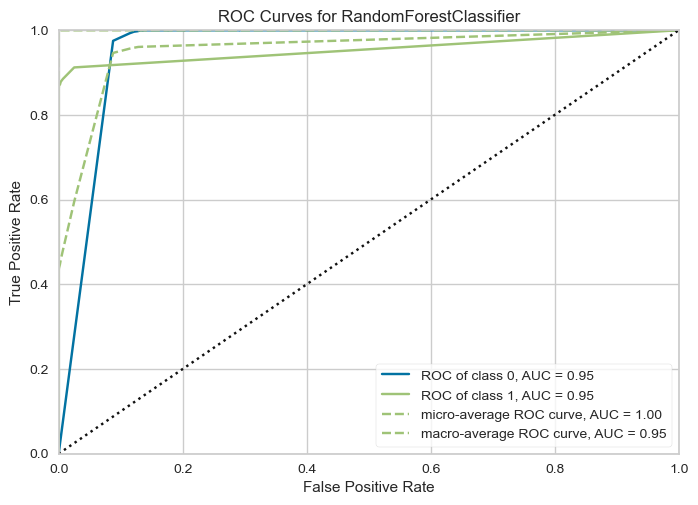

In [ ]:
plot_model(best, plot = 'auc')

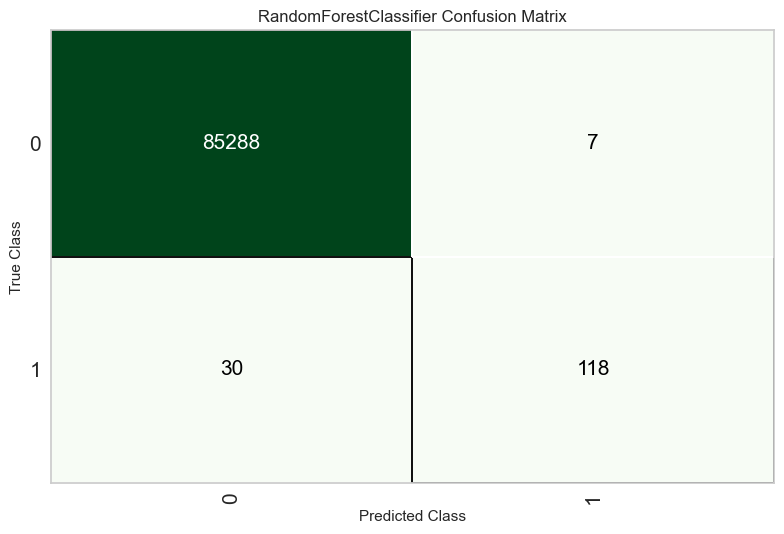

In [25]:
plot_model(best, plot = 'confusion_matrix')

In [26]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9996,0.9545,0.7973,0.9440,0.8645,0.8643,0.8673


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
171678,120765.0,2.143077,-1.236282,-0.434332,-0.790925,-0.994385,0.264117,-1.275122,0.095039,0.740932,...,0.179502,-1.055829,-0.276949,-0.300796,0.037404,-0.047054,31.000000,0,0,1.0
230723,146450.0,-1.483918,0.761555,1.209381,4.252389,-0.230136,3.436313,0.849710,1.176623,-2.240782,...,0.777946,-1.755510,-0.083990,0.185693,0.154788,0.096216,346.670013,0,0,1.0
176373,122737.0,-1.956574,2.101941,0.453091,-1.159029,0.018464,-0.883012,0.706348,-0.354128,1.854630,...,-0.012995,-0.080070,0.038542,-0.370348,-0.333400,-0.323682,0.230000,0,0,1.0
185391,126645.0,-1.868115,1.433285,0.565260,-1.112808,-0.142125,-0.519516,0.148553,0.989518,-0.774599,...,0.056023,-0.464035,0.236810,0.179458,0.090188,-0.040322,11.140000,0,0,1.0
134195,80692.0,1.110872,-0.140120,1.526167,1.255272,-1.411129,-0.537906,-0.794892,0.139626,0.875629,...,-0.027514,0.685844,0.276968,-0.271703,0.066265,0.046637,22.660000,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254118,156588.0,-0.335919,0.856781,-1.250188,-1.824806,0.047590,-0.496408,-0.145478,0.491390,-1.719179,...,-0.098150,0.135267,-0.709367,-0.061905,-0.128741,0.123834,15.000000,0,0,1.0
168895,119433.0,-1.158545,1.313982,2.999033,4.361603,-0.390229,2.897394,-0.615956,0.618872,0.489688,...,-0.431885,0.063727,0.414374,0.673193,0.604809,0.149925,37.939999,0,0,1.0
276318,167014.0,-1.059472,1.508800,-1.561539,-1.209354,0.733289,-1.343619,0.965376,0.358232,-0.377645,...,-0.101403,-0.380913,-0.264361,0.072130,-0.030694,-0.055827,1.460000,0,0,1.0
278703,168375.0,-3.083714,3.172779,-2.188112,-1.588091,0.126680,-0.033073,0.060617,1.048199,1.455690,...,0.182731,-0.392239,0.274268,0.205743,1.121335,0.689937,8.940000,0,0,1.0


In [27]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  

In [28]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Admin\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Time', 'V1', 'V2', 'V3', 'V4',
                                             'V5', 'V6', 'V7', 'V8', 'V9',
                                             'V10', 'V11', 'V12', 'V13', 'V14',
                                             'V15', 'V16', 'V17', 'V18', 'V19',
                                             'V20', 'V21', 'V22', 'V23', 'V24',
                                             'V25', 'V26', 'V27', 'V28',
                                             'Amount'],
                                    transformer=SimpleImputer(a...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max